In [20]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# read file
file="https://www.dropbox.com/s/5w4l7fvus79wvew/femaleVisitsToPhysician.csv?dl=1"
df=pd.read_csv(file)
df.columns ## Index(['Unnamed: 0', 'year', 'age', 'sex', 'consultations', 'population','perCapita', 'visits'] 
df.head()

,Unnamed: 0,year,age,sex,consultations,population,perCapita
0,4,2006,1,f,67194.0,28221.0,2.380993
1,7,2006,2,f,49802.0,28361.0,1.756003
2,10,2006,3,f,42741.0,27899.0,1.531990
3,13,2006,4,f,36555.0,28420.0,1.286242
4,16,2006,5,f,33319.0,29479.0,1.130262


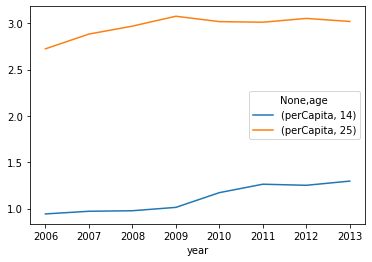

In [4]:
df2 = df.query('age==14 or age==25')
df2 = df2[['year', 'age', 'perCapita']]
df2.set_index(['year', 'age']).unstack('age').plot()

In [5]:
df14and25 = df2.set_index(['year', 'age']).unstack('age')
df14and25

perCapita          
age         14        25
year                    
2006  0.941863  2.724488
2007  0.970424  2.883638
2008  0.976127  2.969386
2009  1.012518  3.076277
2010  1.171481  3.018165
2011  1.262579  3.011706
2012  1.250965  3.052795
2013  1.296148  3.019887

In [6]:
df14and25['copay'] = 0
df14and25['copay'] = df14and25.copay.where(df14and25.index<2010, 1)
df14and25

perCapita           copay
age         14        25      
year                          
2006  0.941863  2.724488     0
2007  0.970424  2.883638     0
2008  0.976127  2.969386     0
2009  1.012518  3.076277     0
2010  1.171481  3.018165     1
2011  1.262579  3.011706     1
2012  1.250965  3.052795     1
2013  1.296148  3.019887     1

In [10]:
result = df14and25.groupby('copay').mean()
result.columns = ['age_14', 'age_25']
result

,age_14,age_25
copay,,
0,0.975233,2.913447
1,1.245293,3.025638


In [11]:
result['age_14'] - result['age_25']

copay
0   -1.938214
1   -1.780345
dtype: float64

In [12]:
(result['age_14'] - result['age_25']).diff()

copay
0         NaN
1    0.157869
dtype: float64

In [13]:
df2

,year,age,perCapita
13,2006,14,0.941863
24,2006,25,2.724488
102,2007,14,0.970424
113,2007,25,2.883638
191,2008,14,0.976127
202,2008,25,2.969386
280,2009,14,1.012518
291,2009,25,3.076277
369,2010,14,1.171481
380,2010,25,3.018165


In [21]:
df2['copay']=0
df2['copay']=df2['copay'].where(df2.year<2010,1)
df2['age_14'] = np.where(df2.age==14,1,0)

## DiD
mod = smf.ols('perCapita~age_14+copay+copay*age_14+year', data = df2).fit()
mod.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              perCapita   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     987.2
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           5.65e-14
Time:                        13:22:42   Log-Likelihood:                 25.410
No. Observations:                  16   AIC:                            -40.82
Df Residuals:                      11   BIC:                            -36.96
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -85.7891     26.764     -3.205      0.008    -144.696     -26.882
age_14          -1.9382      0.042    -45.974      0.000      -2.031      -1.845
copay           -0.0646      0.068     -0.950      0.363      -0.214       0.085
copay:age_14     0.1579      0.060      2.648      0.023       0.027       0.289
year             0.0442      0.013      3.314      0.007       0.015       0.074
==============================================================================
Omnibus:                        3.063   Durbin-Watson:                   2.266
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                1.114
Skew:                          -0.527   Prob(JB):                        0.573
Kurtosis:                       3.750   Cond. No.                     3.61e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""